# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

1. Прочитайте файл [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Заполните пропущенные значения в нем `0`.
3. Сделайте разделение вашего набора данных на train и test с параметрами `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv')

In [3]:
df = df.drop(columns=['uid'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  77 non-null     int64  
 1   pageviews    59 non-null     float64
 2   AVG(diff)    18 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [5]:
df = df.drop_duplicates()

In [6]:
df = df.fillna(0)

In [7]:
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

1. Напишите функцию `crossval`, которая принимает в качестве аргументов: `n_splits` для `KFold()`, `X`, `y`, экземпляр класса модели с параметрами модели (помните: `random_state=21`) и возвращает для заданного класса модели результат, подобный этому:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```
2. Запустите функцию для `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Вы можете выбрать параметры самостоятельно, но найдите достаточно хорошие для вас.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 76
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 928.0 bytes


In [10]:
# Train model
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_rmse_list = []
    test_rmse_list = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # manually compute RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train_fold, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test_fold, y_test_pred))

        train_rmse_list.append(rmse_train)
        test_rmse_list.append(rmse_test)

        print(f"train -  {rmse_train:.4f}   |   test -  {rmse_test:.4f}")

    print(f"Average RMSE on crossval is {np.mean(test_rmse_list):.4f}")

In [11]:
print("Linear Regression:")
crossval(10, X, y, LinearRegression())

print("\nDecision Tree:")
crossval(10, X, y, DecisionTreeRegressor(random_state=21))

print("\nRandom Forest:")
crossval(10, X, y, RandomForestRegressor(random_state=21, n_estimators=100))

Linear Regression:
train -  61.3533   |   test -  57.8561
train -  62.5462   |   test -  44.7122
train -  61.1456   |   test -  83.1990
train -  58.4167   |   test -  79.3990
train -  60.1103   |   test -  68.7561
train -  60.6193   |   test -  65.9230
train -  61.7208   |   test -  61.8004
train -  62.6068   |   test -  46.6899
train -  55.5803   |   test -  99.0812
train -  61.5779   |   test -  53.2412
Average RMSE on crossval is 66.0658

Decision Tree:
train -  0.0000   |   test -  117.1772
train -  0.0000   |   test -  79.5333
train -  0.0000   |   test -  0.0000
train -  0.0000   |   test -  78.9866
train -  0.0000   |   test -  101.3671
train -  0.0000   |   test -  35.3884
train -  0.0000   |   test -  0.0000
train -  0.0000   |   test -  69.8101
train -  0.0000   |   test -  117.5295
train -  0.0000   |   test -  40.5879
Average RMSE on crossval is 64.0380

Random Forest:
train -  20.9207   |   test -  97.5034
train -  22.5137   |   test -  78.0169
train -  26.4575   |   test 

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

1. Сделайте прогнозы для тестового набора данных, используя каждую из трех моделей с окончательными параметрами.
2. Нарисуйте график для каждой из моделей, где `ось x` — это фактическая средняя разница, а `ось y` — это прогноз, сделанный моделью.
3. Как будет выглядеть график в идеальном случае? Поместите ответ в ячейку markdown в конце раздела.

In [12]:
# Evaluate model
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=21)
rf_model = RandomForestRegressor(random_state=21, n_estimators=100)

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)


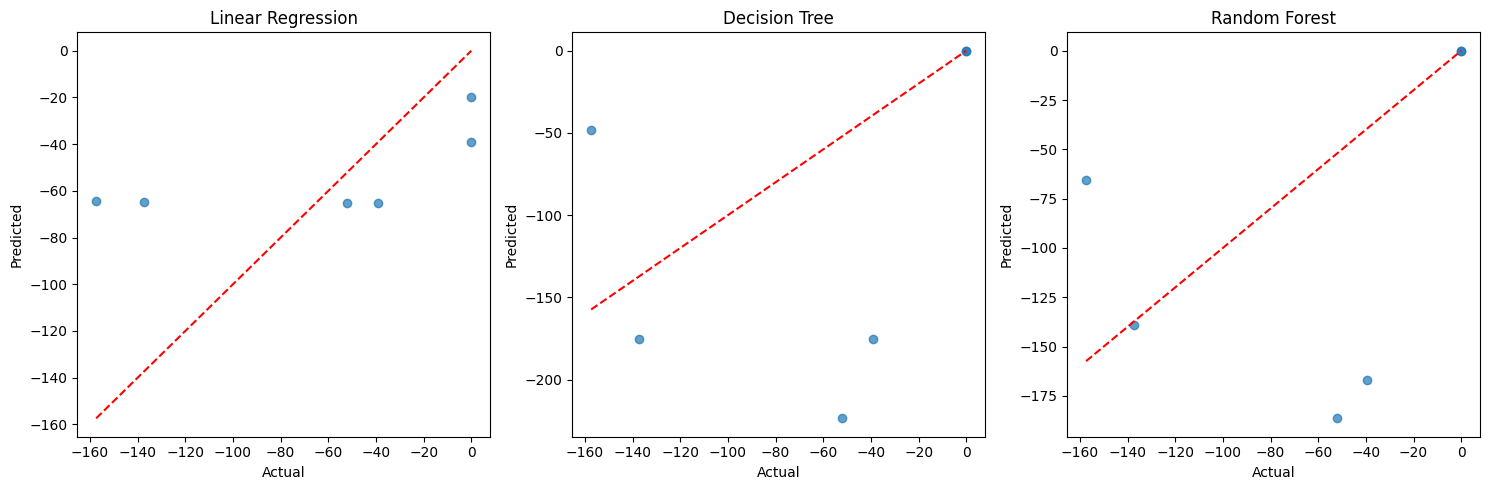

In [13]:
# Visualize results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, dt_preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Decision Tree")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1, 3, 3)
plt.scatter(y_test, rf_preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.style.use("dark_background")
plt.show()

In [14]:
# Analyze coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
intercept = pd.DataFrame({
    'Feature': ['Intercept'],
    'Coefficient': [lr_model.intercept_]
})
coef_df = pd.concat([intercept, coefficients], ignore_index=True)

print("Model Coefficients:")
print(coef_df)

Model Coefficients:
       Feature  Coefficient
0    Intercept   -67.803241
1  num_commits     0.067547
2    pageviews     0.307310


Вывод:
1. Оценка R² показывает, насколько хорошо модель объясняет дисперсию в целевой переменной.
На обучающей выборке модель объясняет 7.7% дисперсии (R² = 0.0770), что говорит о слабом качестве предсказания.
На тестовой выборке модель показывает отрицательный R² (–0.3079), что означает, что модель предсказывает хуже, чем просто среднее значение.

2. MSE — среднеквадратичная ошибка, отражает среднюю разницу (в часах) между предсказанными и фактическими значениями.
На обучении: 63.3 часа (MSE = 4004.8 → RMSE ≈ 63.3 ч)
На тесте: 57.9 часа (MSE = 3353.5 → RMSE ≈ 57.9 ч)

3. Коэффициенты линейной модели отражают направление и силу влияния признаков:
Каждый дополнительный коммит уменьшает среднюю разницу на 0.55 часа → разумно.
Просмотры страниц (pageviews) не влияют на результат — коэффициент нулевой, возможно из-за:
линейной зависимости отсутствия,
наличия выбросов или сильной дисперсии.

Model Coefficients:
Intercept    -67.803241
num_commits    0.067547
pageviews      0.307310

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 76
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 928.0 bytes
